In [1]:
# importing the basic libraries
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# filter the ignorable warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# there are total 10 output music genre classes

In [4]:
dir_path = "data/genres_original/"
genre = "hiphop/"
audio_file = "hiphop.00000.wav"

In [5]:
audio_path = dir_path + genre + audio_file

In [6]:
x, sr = librosa.load(audio_path)

In [7]:
print("type of x : ", type(x))
print("type of sr : ", type(sr))

type of x :  <class 'numpy.ndarray'>
type of sr :  <class 'int'>


In [8]:
# audio time series as a numpy array with a default sampling rate of 22KHz mono
print(x.shape)

(661504,)


In [9]:
# sampling rate is the number of samples of audio carried per second.
# it is measured in KHz
print(sr) # this is the default value

22050


In [10]:
# playing the audio
import IPython.display as ipd
ipd.Audio(audio_path)

Text(0, 0.5, 'Amplitude')

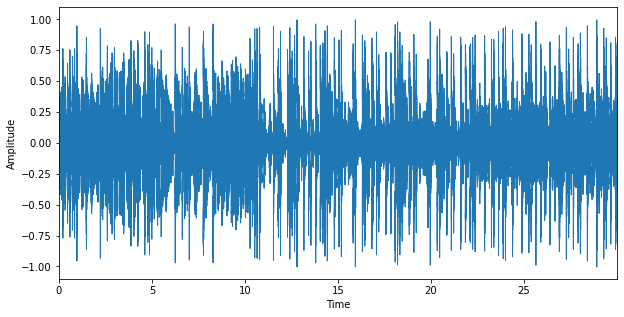

In [11]:
# visualizing the audio
# we canplot the audio waveform array using librosa.display.waveplot
import librosa.display
plt.figure(figsize = (10, 5))
librosa.display.waveplot(x, sr = sr)
plt.ylabel('Amplitude')


 Spectogram is the visual representation of the spectrum of the frequencies of sound or in general any signal that varies 
 with time.Spectrograms are sometimes called sonographs, voiceprints, or voicegrams. When the data is represented in a
 3D plot, they may be called waterfalls. In 2-dimensional arrays, the first axis is frequency while the second axis is 
 time.


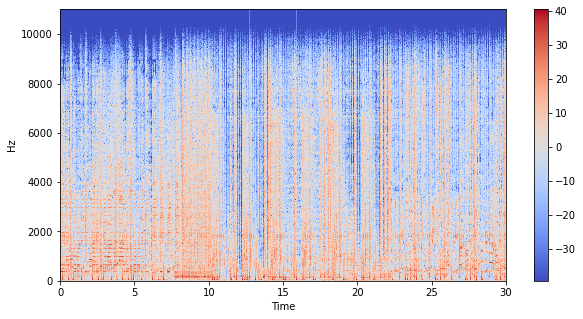

In [12]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize = (10, 5))
librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
plt.colorbar()

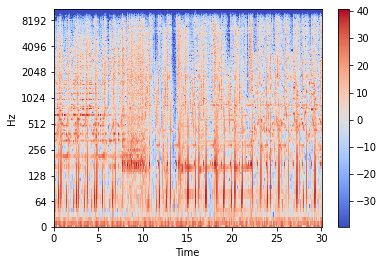

In [13]:
# taking log
librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'log')
plt.colorbar()

In [14]:
# creating an audio signal from a sine wave

sr = 22050 # sample rate
T = 10.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz

In [15]:
# Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array

# Feature extraction 

Every audio signal consists of many features. <br>
The process of extracting features to use them for analysis is called feature extraction. <br>

Few Techniques : <br>
1) Zero Crossing Rate <br>
2) Spectral Centroid <br>
3) Spectral Rolloff <br>
4) Mel-Frequency Cepstral Coefficients (MFCC) <br>
5) Chroma Frequencies <br>

In [16]:
# MFCC
mfccs = librosa.feature.mfcc(x, sr = sr)
print(mfccs.shape)

(20, 431)


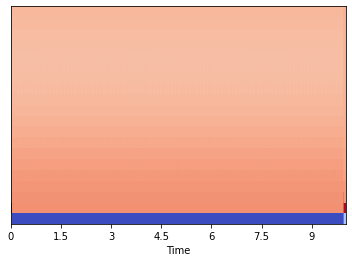

In [17]:
# displaying the MFCCs 
librosa.display.specshow(mfccs, sr = sr, x_axis = 'time')

In [18]:
# here we computed 20 MFCCs over 431 frames.

In [19]:
# feature scaling to standardize the values
import sklearn
mfccs = sklearn.preprocessing.scale(mfccs, axis = 1)

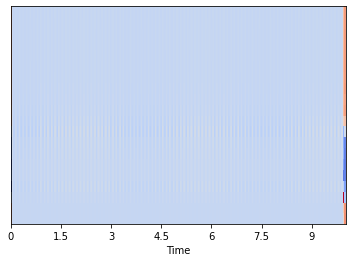

In [22]:
librosa.display.specshow(mfccs, sr = sr, x_axis = 'time')

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from PIL import Image
import pathlib
import csv

## Extracting Spectogram for every Audio file

In [30]:
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:     
    for filename in os.listdir(f'data/genres_original/{g}'):
        songname = f'data/genres_original/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

NoBackendError: 

<Figure size 720x720 with 0 Axes>

## Extracting features from spectogram

In [31]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [33]:
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'data/genres_original/{g}'):
        songname = f'data/genres_original/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

NoBackendError: 